In [17]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [23]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

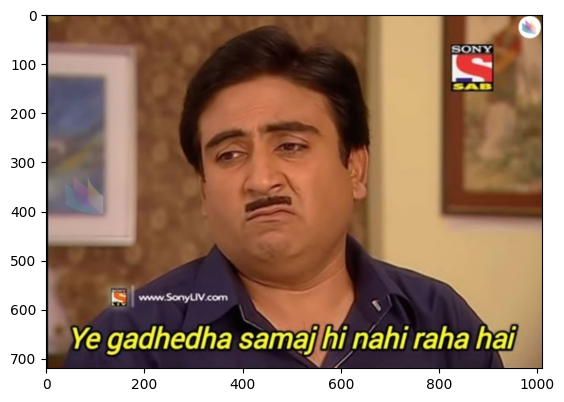

In [62]:
filename = "jetha.jpg"
img = read_file(filename)

# Create Edge Mask 

In [70]:
def edge_mask(img , line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

    return edges

# Cartoon Image

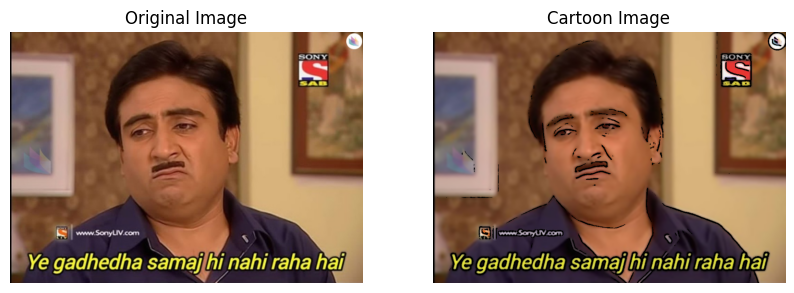

In [69]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply median blur
gray = cv2.medianBlur(gray, 5)

bright_contrast_img = adjust_brightness_contrast(img, brightness=10, contrast=30)

# Detect edges
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

# Apply bilateral filter
color = cv2.bilateralFilter(img, 9, 500, 500)

# Combine edges and color
cartoon = cv2.bitwise_and(color, color, mask=edges)

#Pencil Sketch :
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.medianBlur(gray, 9)
edges = cv2.Canny(gray_blur, 70, 180)

# Display the result
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Cartoon Image')
plt.imshow(cartoon)
plt.axis('off')

plt.show()
